# LSTM과 GRU 셀

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/9-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## LSTM 신경망 훈련하기

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

2022-01-08 06:32:10.646756: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [4]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 14s 40ms/step - loss: 0.6923 - accuracy: 0.5464 - val_loss: 0.6913 - val_accuracy: 0.5820
Epoch 2/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6897 - accuracy: 0.6051 - val_loss: 0.6879 - val_accuracy: 0.6180
Epoch 3/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6836 - accuracy: 0.6439 - val_loss: 0.6787 - val_accuracy: 0.6432
Epoch 4/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6595 - accuracy: 0.6526 - val_loss: 0.6346 - val_accuracy: 0.6884
Epoch 5/100
313/313 [==============================] - 12s 38ms/step - loss: 0.5967 - accuracy: 0.7280 - val_loss: 0.5802 - val_accuracy: 0.7412
Epoch 6/100
313/313 [==============================] - 12s 39ms/step - loss: 0.5594 - accuracy: 0.7525 - val_loss: 0.5513 - val_accuracy: 0.7428
Epoch 7/100
313/313 [==============================] - 12s 38ms/step - loss: 0.5335 - accuracy: 0.7606 - val_loss: 0.5271 - val_ac

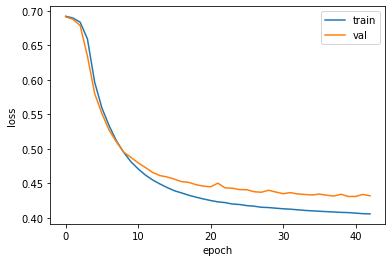

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 순환 층에 드롭아웃 적용하기

In [6]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [7]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 14s 40ms/step - loss: 0.6923 - accuracy: 0.5468 - val_loss: 0.6912 - val_accuracy: 0.6046
Epoch 2/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6893 - accuracy: 0.6141 - val_loss: 0.6861 - val_accuracy: 0.6644
Epoch 3/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6778 - accuracy: 0.6650 - val_loss: 0.6600 - val_accuracy: 0.7026
Epoch 4/100
313/313 [==============================] - 12s 40ms/step - loss: 0.6167 - accuracy: 0.7024 - val_loss: 0.5843 - val_accuracy: 0.7162
Epoch 5/100
313/313 [==============================] - 12s 38ms/step - loss: 0.5748 - accuracy: 0.7236 - val_loss: 0.5587 - val_accuracy: 0.7398
Epoch 6/100
313/313 [==============================] - 12s 38ms/step - loss: 0.5519 - accuracy: 0.7398 - val_loss: 0.5390 - val_accuracy: 0.7512
Epoch 7/100
313/313 [==============================] - 12s 39ms/step - loss: 0.5328 - accuracy: 0.7549 - val_loss: 0.5242 - val_ac

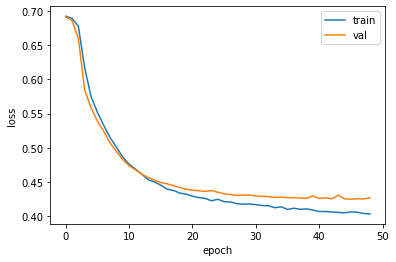

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 2개의 층을 연결하기

In [9]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [10]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 28s 77ms/step - loss: 0.6926 - accuracy: 0.5441 - val_loss: 0.6918 - val_accuracy: 0.5796
Epoch 2/100
313/313 [==============================] - 23s 74ms/step - loss: 0.6892 - accuracy: 0.5978 - val_loss: 0.6856 - val_accuracy: 0.6170
Epoch 3/100
313/313 [==============================] - 23s 74ms/step - loss: 0.6687 - accuracy: 0.6461 - val_loss: 0.6383 - val_accuracy: 0.6836
Epoch 4/100
313/313 [==============================] - 23s 75ms/step - loss: 0.5917 - accuracy: 0.7092 - val_loss: 0.5636 - val_accuracy: 0.7230
Epoch 5/100
313/313 [==============================] - 23s 74ms/step - loss: 0.5468 - accuracy: 0.7393 - val_loss: 0.5349 - val_accuracy: 0.7456
Epoch 6/100
313/313 [==============================] - 23s 74ms/step - loss: 0.5279 - accuracy: 0.7466 - val_loss: 0.5159 - val_accuracy: 0.7574
Epoch 7/100
313/313 [==============================] - 23s 74ms/step - loss: 0.5141 - accuracy: 0.7578 - val_loss: 0.5025 - val_ac

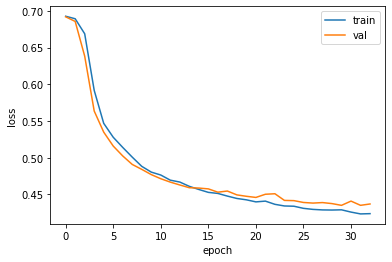

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## GRU 신경망 훈련하기

In [12]:
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [13]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 16s 44ms/step - loss: 0.6920 - accuracy: 0.5408 - val_loss: 0.6912 - val_accuracy: 0.5474
Epoch 2/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6895 - accuracy: 0.5738 - val_loss: 0.6884 - val_accuracy: 0.5764
Epoch 3/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6856 - accuracy: 0.5958 - val_loss: 0.6839 - val_accuracy: 0.5886
Epoch 4/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6794 - accuracy: 0.6119 - val_loss: 0.6771 - val_accuracy: 0.6008
Epoch 5/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6703 - accuracy: 0.6244 - val_loss: 0.6668 - val_accuracy: 0.6166
Epoch 6/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6564 - accuracy: 0.6421 - val_loss: 0.6508 - val_accuracy: 0.6352
Epoch 7/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6350 - accuracy: 0.6601 - val_loss: 0.6252 - val_ac

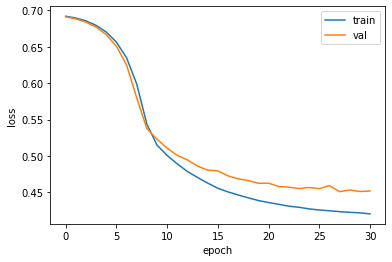

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 마무리

In [15]:
test_seq = pad_sequences(test_input, maxlen=100)

rnn_model = keras.models.load_model('best-2rnn-model.h5')

rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 12s 14ms/step - loss: 0.4306 - accuracy: 0.7988


[0.43062207102775574, 0.798799991607666]